# Text analysis of Twitter data on US airlines
This is the third and last assignment. The assignment is focused on text processing and SVM.

The dataset is tweets about US airlines. It includes Twitter data that was scraped from February of 2015 and classified into positive, negative, and neutral.

There is no following categorization of the negative reasons (such as "late flight" or "rude service").

Using this dataset we have to identify the sentiment of a given tweet (positive, negative, and neutral) based on its textual content.

### Best model
Logistic Regression Classifier with word stemming and n-grams (1, 3). Cross validation score of 79.02%
### Focus model
SVM with various text transformations and n-grams. Best cross validation score 77.84%

### Minimum runtime : 1 hr
### Maximum runtime : 2 hrs - with last section for all comparisons

## Summary
1. Import data and peek at the structure
2. Check if duplicates exist.
3. Summarize missing, unique and zeroes in each column
4. Check how many columns are created from converting everything to dummies
    1. Apply a simple decision tree to dummified data and print the tree and expected prediction score
    2. Apply LogisticRegression, KNeighborsClassifier, GaussianNB, RandomForestClassifier and check expected prediction score
5. Build some plots
    1. Sentiments per airlines
    2. Word cloud for negative, neutral and positive sentiments
6. Extract only tweet text and airline sentiment
7. Create some functions to convert text to desired format
    1. Letters only
    2. Words
    3. Stemmed words
    4. Include stopwords
8. Apply some algorithms to classify text and check expected prediction score
    1. LogisticRegression
    2. GaussianNB
    3. KNeighborsClassifier
    4. SVC
    5. RandomForestClassifier
9. Print summary of results from different classifiers against different text operations
10. Apply all algorithms above with n-grams
11. Print summary of results with n-grams
12. Print summary of comparison for algorithm run with and without n-grams


## conda install -c conda-forge wordcloud
May be required to install the word cloud package. If the package is not present, we can skip the cell below which uses wordcloud

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Imports for different models for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import GradientBoostingClassifier
import sklearn.datasets as datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from xgboost import XGBClassifier

In [5]:
import pydotplus
from IPython.display import Image

In [6]:
df = pd.read_csv('training.csv')

In [7]:
df.head(2)

,tweet_id,airline_sentiment,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,5.677744e+17,negative,United,kristofurmac,0,@united no they were to busy taking to each ot...,NaN,2015-02-17 11:55:49 -0800,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.680326e+17,neutral,US Airways,MiddleSeatView,0,@USAirways if there are empty first class seat...,NaN,2015-02-18 05:01:30 -0800,"Washington, D.C.",Atlantic Time (Canada),NaN,NaN,NaN,NaN,NaN,NaN


___

___

___

### There are some duplicates and drop_duplicates does not remove them
We might have to treat them separately

In [8]:
len(df.tweet_id.unique()) == len(df)

False

In [9]:
len(df.drop_duplicates()) == len(df.tweet_id.unique())

False

Listing the duplicate rows

In [10]:
count_of_duplicate_tweet_ids = 0
newdf = pd.DataFrame()
for tw_id in df.tweet_id:
    if len(df[df.tweet_id == tw_id]) > 1:
        count_of_duplicate_tweet_ids = count_of_duplicate_tweet_ids + 1
        newdf = newdf.append(df[df.tweet_id == tw_id])
print(count_of_duplicate_tweet_ids)
newdf

54


,tweet_id,airline_sentiment,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
180,5.702764e+17,negative,American,jkordyback,0,@AmericanAir robocalls me with another Cancell...,NaN,2015-02-24 09:37:47 -0800,"North Saanich, BC",Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
237,5.702764e+17,negative,American,jkordyback,0,@AmericanAir robocalls me with another Cancell...,NaN,2015-02-24 09:37:47 -0800,"North Saanich, BC",Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
180,5.702764e+17,negative,American,jkordyback,0,@AmericanAir robocalls me with another Cancell...,NaN,2015-02-24 09:37:47 -0800,"North Saanich, BC",Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
237,5.702764e+17,negative,American,jkordyback,0,@AmericanAir robocalls me with another Cancell...,NaN,2015-02-24 09:37:47 -0800,"North Saanich, BC",Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
547,5.703083e+17,negative,American,SweeLoTmac,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito,NaN,NaN,NaN,NaN,NaN,NaN
4025,5.703083e+17,negative,American,SweeLoTmac,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito,NaN,NaN,NaN,NaN,NaN,NaN
582,5.702714e+17,negative,American,BartonDVM,0,@AmericanAir I'm frustrated by all of the @USA...,NaN,2015-02-24 09:17:47 -0800,Arkansas,Central Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
6093,5.702714e+17,negative,American,BartonDVM,0,@AmericanAir I'm frustrated by all of the @USA...,NaN,2015-02-24 09:17:47 -0800,Arkansas,Central Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
621,5.702802e+17,negative,American,TheVirtualJosh,0,@AmericanAir flight 1181 out of Vegas to DFW. ...,NaN,2015-02-24 09:52:55 -0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6604,5.702802e+17,negative,American,TheVirtualJosh,0,@AmericanAir flight 1181 out of Vegas to DFW. ...,NaN,2015-02-24 09:52:55 -0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___

___

___

### Summary of Missing, Unique and Zero values

In [11]:
col_missing = pd.DataFrame()

unique_list = pd.Series()
missing_list = pd.Series()
zeros_list = pd.Series()

for col in df.columns:
    unique_list = unique_list.append(pd.Series(len(df[col].unique())))
    missing_list = missing_list.append(pd.Series(len(df[df[col].isnull()])))
    zeros_list = zeros_list.append(pd.Series(len(df[df[col] == 0])))

col_missing = pd.DataFrame( {'UNIQUE': unique_list,
                             'MISSING': missing_list,
                             'ZEROES': zeros_list})
col_missing.index = df.columns
col_missing

,MISSING,UNIQUE,ZEROES
tweet_id,0,6973,0
airline_sentiment,0,3,0
airline,0,6,0
name,0,4699,0
retweet_count,0,11,6636
text,0,6958,0
tweet_coord,6263,650,0
tweet_created,218,6702,0
tweet_location,2187,2219,0
user_timezone,2305,241,0


___

___

___

### Dummies created by pandas.get_dummies
Too many columns are created. We must transform the data frame before applying any algorithm. However, it will be interesting to find the prediction score before transformations.

In [12]:
# Inspect dummies created automatically
dummies_sum = 0
for col in df.columns:
    l = len(pd.get_dummies(df[col]).columns)
    dummies_sum = dummies_sum + l
    print('Dummies for ', col, ':', l)
    
print('Total number of columns :', dummies_sum)

Dummies for  tweet_id : 6973
Dummies for  airline_sentiment : 3
Dummies for  airline : 6
Dummies for  name : 4699
Dummies for  retweet_count : 11
Dummies for  text : 6958
Dummies for  tweet_coord : 649
Dummies for  tweet_created : 6701
Dummies for  tweet_location : 2218
Dummies for  user_timezone : 240
Dummies for  Unnamed: 10 : 34
Dummies for  Unnamed: 11 : 11
Dummies for  Unnamed: 12 : 2
Dummies for  Unnamed: 13 : 1
Dummies for  Unnamed: 14 : 1
Dummies for  Unnamed: 15 : 1
Total number of columns : 28508


In [13]:
y_var = df.airline_sentiment
X_dummies = pd.get_dummies(df.drop('airline_sentiment', axis=1))

#### A simple decision tree
Runtime : A couple of seconds

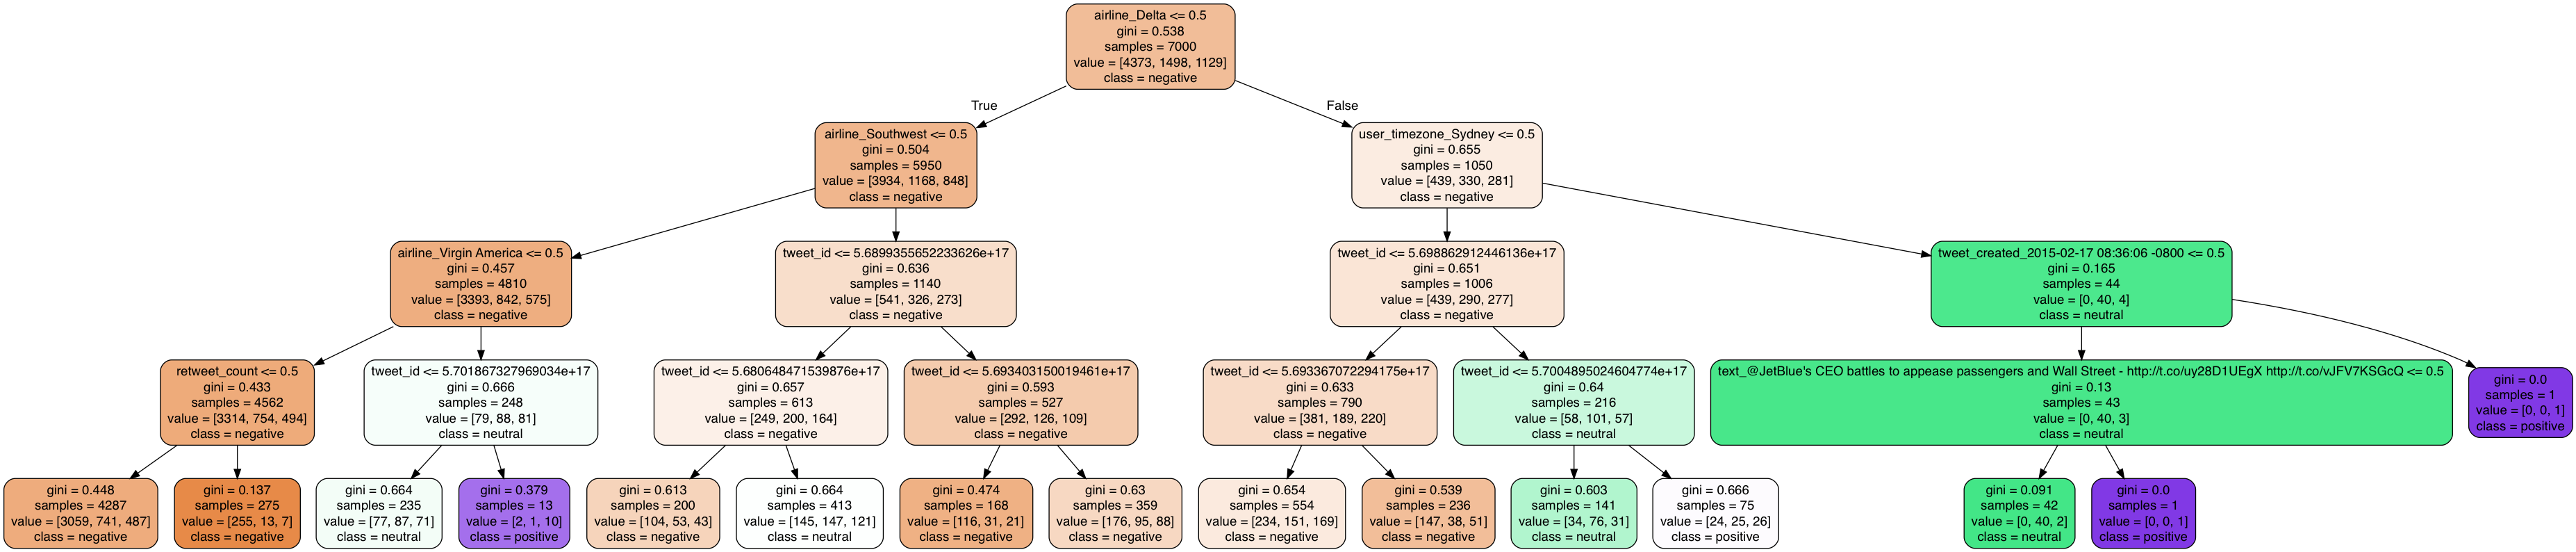

In [14]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_dummies, y_var)
dot_graph = export_graphviz(dt, out_file=None, feature_names=X_dummies.columns,
                           class_names=y_var.unique(),
                           filled=True,
                           rounded=True,
                           special_characters=False)
graph = pydotplus.graph_from_dot_data(dot_graph)
Image(graph.create_png())

#### What is the prediction accuracy from this decision tree?

In [15]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_dummies, y_var)
dt.fit(X_d_train, y_d_train)
dt.score(X_d_test, y_d_test)

0.6411428571428571

___

___

___

#### Logistic regression, KNN, Naive Baye's and Random Forest classifier CV scores
Runtime : ~10 mins

In [ ]:
classifier_list = [LogisticRegression(),
                  KNeighborsClassifier(),
                  GaussianNB(),
                  RandomForestClassifier()]
                  #SVC(kernel="linear", C=0.1, probability=True)]   too early to apply SVM. Takes more than 2 hours.

model_list = []
cv_accuracy_list = []
    
for classifier in classifier_list:
    classifier.fit(X_dummies, y_var)
    score = cross_val_score(classifier, X_dummies, y_var, cv=5).mean()
    cv_accuracy_list.append(score)
    model_list.append(classifier.__class__.__name__)
    #print(Score, 'for', classifier.__class__.__name__, '\n')
    
pd.DataFrame({'Model': model_list, 'CV Accuracy': cv_accuracy_list}).head()

___

___

___

### Data plotting

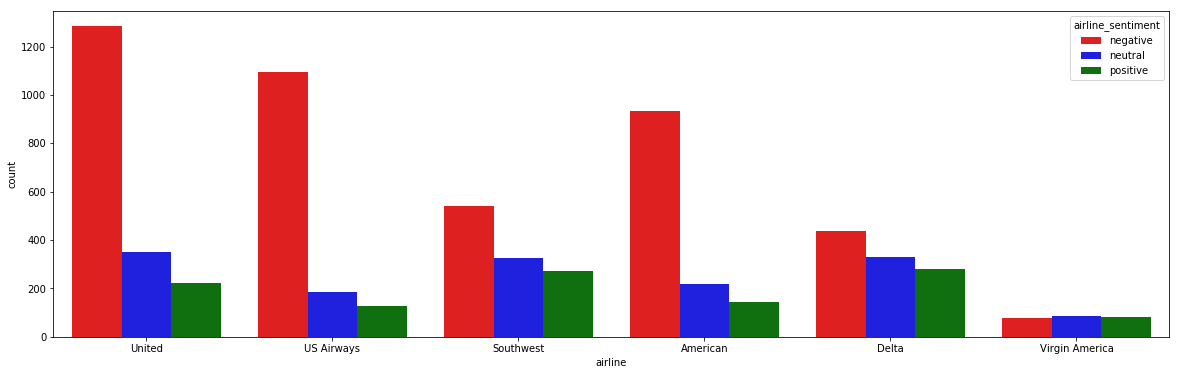

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x='airline', data=df, hue='airline_sentiment',
              palette={'negative':'red', 'neutral':'blue', 'positive':'green'})

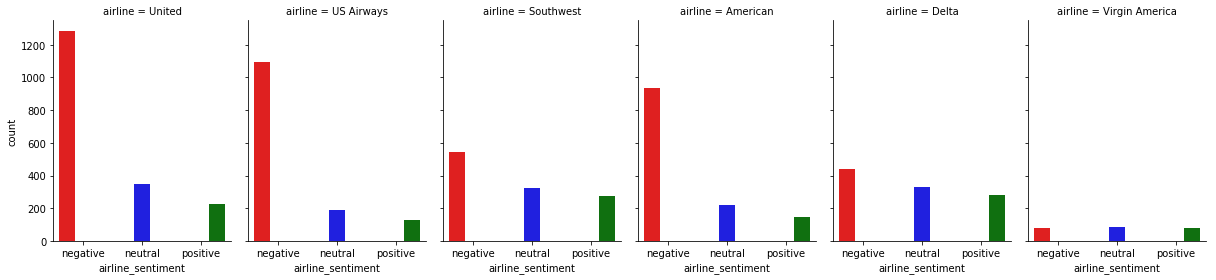

In [18]:
sns.factorplot(x="airline_sentiment", hue="airline_sentiment", col="airline", data=df, kind="count",
               size=4, aspect=.7, palette={'negative':'red', 'neutral':'blue', 'positive':'green'});

### Word cloud for the three sentiment classes

In [19]:
#conda install -c conda-forge wordcloud 
from wordcloud import WordCloud,STOPWORDS

_______________ negative sentiment _______________


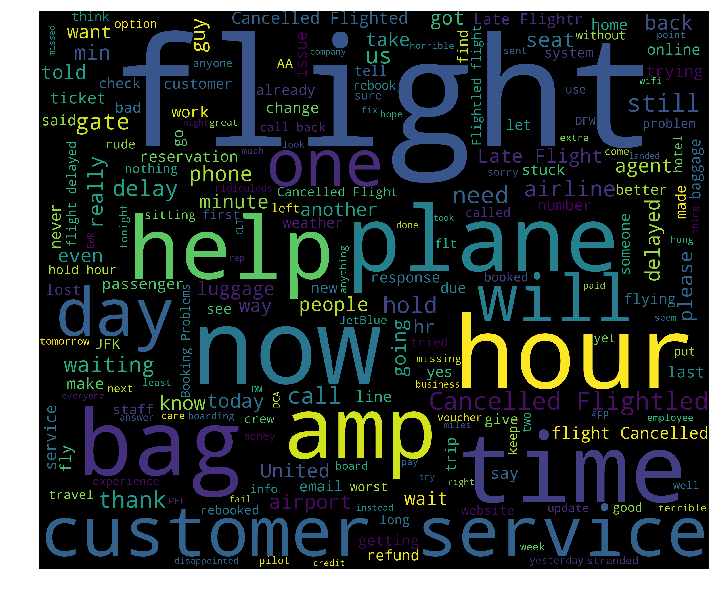

_______________ neutral sentiment _______________


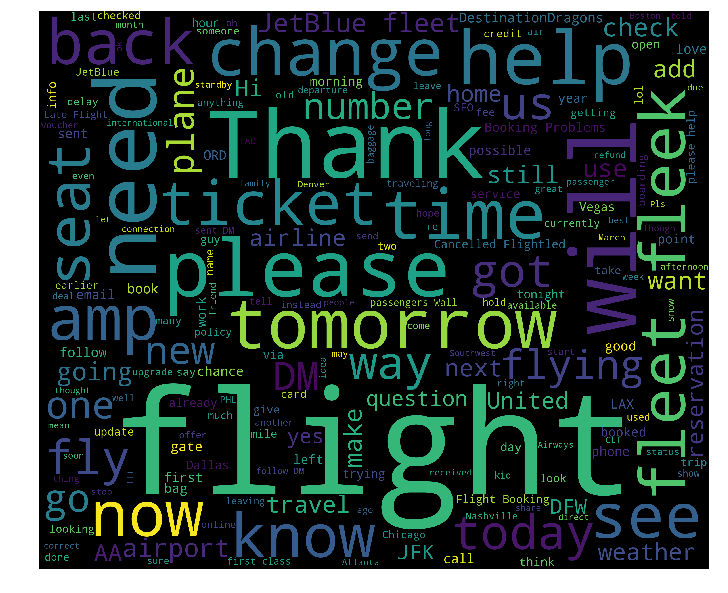

_______________ positive sentiment _______________


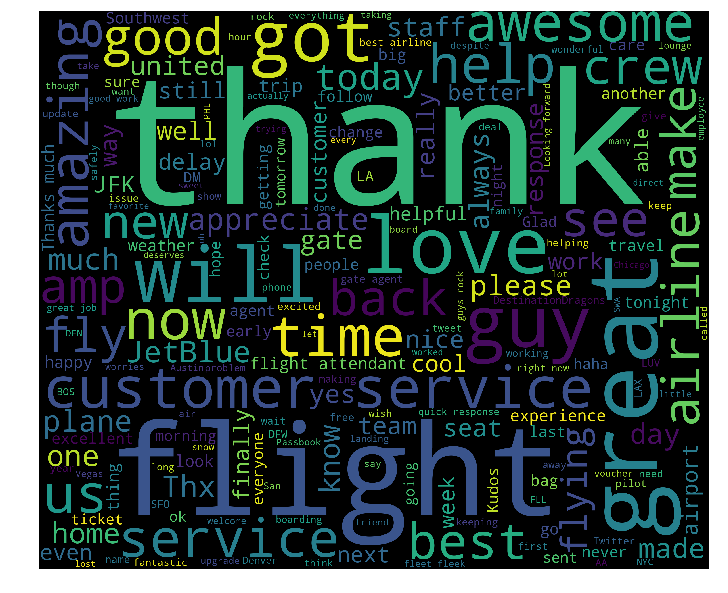

In [20]:
for sentiment in df.airline_sentiment.unique():
    print('_______________', sentiment, 'sentiment', '_______________')
    neg_df=df[df.airline_sentiment==sentiment]
    words = ' '.join(neg_df['text'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'])

    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(cleaned_word)

    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

___

___

___

### Looking at text and sentiment

In [21]:
tweet_sentiment_df = df.loc[:, ['text', 'airline_sentiment']]
tweet_sentiment_df.head(2)

,text,airline_sentiment
0,@united no they were to busy taking to each ot...,negative
1,@USAirways if there are empty first class seat...,neutral


### Creating functions for transforming tweets to algorithm inputs
Each one does a progressive text extraction to prepare the word lists.

In [22]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [23]:
def letters_only(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    
    return( " ".join( words ))

def lemmatized_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    return( " ".join( lemmatized ))

def stemmed_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    stemmer = LancasterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))

def stopped_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    stemmer = LancasterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    stops = set(stopwords.words("english"))                 
    meaningful_words = [w for w in stemmed if not w in stops]
    
    return( " ".join( meaningful_words ))

### Another function to run models
Parameters:

function_list - A list of text transformation functions

classifier_list - A list of ML algorithms to run

ngrams - Default (1, 1). Set to a different range to run algorithms with ngrams

In [24]:
def run_models(function_list, classifier_list, ngrams=(1,1)):
    accuracy_list_df = []
    models_dict = {}
    print('Progress')
    counter = 0
    for text_function in function_list:
        print('\n', text_function.__name__)
        tweet_sentiment_df['words_tweet']=tweet_sentiment_df['text'].apply(lambda x: text_function(x))
        train_st_df, test_st_df = train_test_split(tweet_sentiment_df,test_size=0.2,random_state=42)

        train_words_tweet= np.ravel(train_st_df.words_tweet)
        test_words_tweet=np.ravel(test_st_df.words_tweet)
        tweet_sentiment_words_tweet = np.ravel(tweet_sentiment_df.words_tweet)

        v = CountVectorizer(analyzer = "word", ngram_range=ngrams)
        train_features= v.fit_transform(train_words_tweet)
        test_features=v.transform(test_words_tweet)
        tweet_sentiment_features = v.transform(tweet_sentiment_words_tweet)

        dense_train_features = train_features.toarray()
        dense_test_features = test_features.toarray()
        dense_tweet_sentiment = tweet_sentiment_features.toarray()

        accuracy_list = []
        model_list = []
        cv_accuracy_list = []

        for classifier in classifier_list:
            score = 0.0
            try:
                classifier.fit(train_features, train_st_df['airline_sentiment'])
                score = cross_val_score(classifier, train_features, train_st_df['airline_sentiment'], scoring = 'accuracy',cv=5).mean()
                fit = classifier.fit(train_features,train_st_df['airline_sentiment'])
                pred = fit.predict(test_features)
            except Exception:
                classifier.fit(dense_train_features, train_st_df['airline_sentiment'])
                Score = cross_val_score(classifier, dense_train_features, train_st_df['airline_sentiment'], scoring = 'accuracy',cv=5).mean()
                fit = classifier.fit(dense_train_features,train_st_df['airline_sentiment'])
                pred = fit.predict(dense_test_features)
            accuracy = accuracy_score(pred,test_st_df['airline_sentiment'])
            cv_accuracy_list.append(score)
            accuracy_list.append(accuracy)
            model_list.append(classifier.__class__.__name__)
            print(classifier.__class__.__name__, '- Accuracy :', accuracy, ', CV Accuracy :', score)
            models_dict[text_function.__name__ + '_' + classifier.__class__.__name__] = classifier

        accuracy_frame = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list, 'CV Accuracy': cv_accuracy_list})
        accuracy_list_df.append(accuracy_frame)
        counter = counter + 1
    return(accuracy_list_df, models_dict)

___

___

___

### Prepare input list for calling the run_models function

#### An iterable list of functions
If we add more functions above, we can add them to the list below.

In [25]:
text_function_list = [letters_only, lemmatized_words, stemmed_words, stopped_words]

#### An iterable list of classification algorithms
If we wish to test different algorithms, we must add them here.

In [26]:
Classifiers = [GaussianNB(),
               LogisticRegression(),
               KNeighborsClassifier(5, n_jobs=-1),
               SVC(kernel="linear", C=0.1, probability=True),
               RandomForestClassifier(n_estimators=500, n_jobs=-1)]

___

___

___

### Run the models and obtain accuracy scores
Runtime : ~30 mins

The for loop below iterates over each text extraction function and applies the list of algorithms above.
It creates a list of data frames. Each data frame stores the accuracy and cross validation accuracy for each model run.

We will use this list later to print the results in a more readable manner.

Some print statements are inserted to understand the progress of steps.

In [27]:
accuracy_frame_list, models_dict_simple = run_models(text_function_list, Classifiers)

Progress

 letters_only
GaussianNB - Accuracy : 0.5507142857142857 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.785 , CV Accuracy : 0.7821444876005197
KNeighborsClassifier - Accuracy : 0.49642857142857144 , CV Accuracy : 0.49071140286952425
SVC - Accuracy : 0.78 , CV Accuracy : 0.7746455938571141
RandomForestClassifier - Accuracy : 0.7457142857142857 , CV Accuracy : 0.7400055636503482

 lemmatized_words
GaussianNB - Accuracy : 0.5214285714285715 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.7871428571428571 , CV Accuracy : 0.7810717835163477
KNeighborsClassifier - Accuracy : 0.49214285714285716 , CV Accuracy : 0.501783799458294
SVC - Accuracy : 0.7728571428571429 , CV Accuracy : 0.7733954342743328
RandomForestClassifier - Accuracy : 0.745 , CV Accuracy : 0.7441111192294217

 stemmed_words
GaussianNB - Accuracy : 0.4521428571428571 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.7885714285714286 , CV Accuracy : 0.7808928926413077
KNeighborsClassifier - Accuracy : 

## Display results from each model above
We use the list of data frames which contain the result for each algorithm applied on each text extraction operation.

Below we create a combined data frame and add a multilevel index to show the result.

#### Change code below if we add more functions or algorithms to build the appropriate data frame

In [28]:
accuracy_df1 = accuracy_frame_list[0]
accuracy_df1 = accuracy_df1.append(accuracy_frame_list[1])
accuracy_df1 = accuracy_df1.append(accuracy_frame_list[2])
accuracy_df1 = accuracy_df1.append(accuracy_frame_list[3])

accuracy_df1.index = accuracy_df1.Model
accuracy_df1 = accuracy_df1.drop('Model', axis=1)

text_function_names = [text_function_list[0].__name__, text_function_list[1].__name__, text_function_list[2].__name__, text_function_list[3].__name__]

accuracy_df1['Text_Method'] = [text_function_names[0], text_function_names[0], text_function_names[0], text_function_names[0], text_function_names[0],
                             text_function_names[1], text_function_names[1], text_function_names[1], text_function_names[1], text_function_names[1],
                             text_function_names[2], text_function_names[2], text_function_names[2], text_function_names[2], text_function_names[2],
                             text_function_names[3], text_function_names[3], text_function_names[3], text_function_names[3], text_function_names[3]]

accuracy_df1.set_index('Text_Method', append=True, inplace=True)

accuracy_df1 = accuracy_df1.reorder_levels(['Text_Method', 'Model'])

In [29]:
accuracy_df1.columns = ['Accuracy', 'CV_Accuracy']
accuracy_df1.style.bar(align='mid', color=['#5fba7d'])

___

___

___

## Check the impact of adding n-grams (1,3)
Runtime : ~1 hr

Tried running with (1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 3)

From (1, 4) onwards time taken is progressively increasing without much impact on final prediction scores.


In [30]:
accuracy_frame_list, models_dict_ngrams = run_models(text_function_list, Classifiers, (1,3))

Progress

 letters_only
GaussianNB - Accuracy : 0.7157142857142857 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.7978571428571428 , CV Accuracy : 0.7825067276715718
KNeighborsClassifier - Accuracy : 0.345 , CV Accuracy : 0.32713706053997016
SVC - Accuracy : 0.7935714285714286 , CV Accuracy : 0.7737473172113234
RandomForestClassifier - Accuracy : 0.7328571428571429 , CV Accuracy : 0.7246472860836486

 lemmatized_words
GaussianNB - Accuracy : 0.7164285714285714 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.8007142857142857 , CV Accuracy : 0.7871486352927314
KNeighborsClassifier - Accuracy : 0.3514285714285714 , CV Accuracy : 0.3369580228873522
SVC - Accuracy : 0.795 , CV Accuracy : 0.777499074881346
RandomForestClassifier - Accuracy : 0.7335714285714285 , CV Accuracy : 0.7282166460753882

 stemmed_words
GaussianNB - Accuracy : 0.7178571428571429 , CV Accuracy : 0.0
LogisticRegression - Accuracy : 0.8085714285714286 , CV Accuracy : 0.790186265691639
KNeighborsClassifier - 

In [31]:
accuracy_df2 = accuracy_frame_list[0]
accuracy_df2 = accuracy_df2.append(accuracy_frame_list[1])
accuracy_df2 = accuracy_df2.append(accuracy_frame_list[2])
accuracy_df2 = accuracy_df2.append(accuracy_frame_list[3])

accuracy_df2.index = accuracy_df2.Model
accuracy_df2 = accuracy_df2.drop('Model', axis=1)

text_function_names = [text_function_list[0].__name__, text_function_list[1].__name__, text_function_list[2].__name__, text_function_list[3].__name__]

accuracy_df2['Text_Method'] = [text_function_names[0], text_function_names[0], text_function_names[0], text_function_names[0], text_function_names[0],
                             text_function_names[1], text_function_names[1], text_function_names[1], text_function_names[1], text_function_names[1],
                             text_function_names[2], text_function_names[2], text_function_names[2], text_function_names[2], text_function_names[2],
                             text_function_names[3], text_function_names[3], text_function_names[3], text_function_names[3], text_function_names[3]]

accuracy_df2.set_index('Text_Method', append=True, inplace=True)

accuracy_df2 = accuracy_df2.reorder_levels(['Text_Method', 'Model'])

In [32]:
accuracy_df2.columns = ['n_grams_Accuracy', 'n_grams_CV_Accuracy']
accuracy_df2.style.bar(align='mid', color=['#5fba7d'])

In [33]:
accuracy_df = pd.concat([accuracy_df1, accuracy_df2], axis = 1 )
accuracy_df['diff_Accuracy'] = accuracy_df2.n_grams_Accuracy - accuracy_df1.Accuracy
accuracy_df['diff_CV_Accuracy'] = accuracy_df2.n_grams_CV_Accuracy - accuracy_df1.CV_Accuracy

In [34]:
accuracy_df.style.bar(align='mid', color=['#d65f5f', '#5fba7d']).format("{:.2%}")

It is interesting to see that while the accuracy scores for Naive Baye's classifier sees a much increase, the KNN classifier accuracy drops a lot.

The Random Forest classifier accuracy is affected negatively but not to a great extent.

Logistic Regression classifier and SVM classifier accuracies have a slight positive impact.

___

___

___

### Final model - Selecting SVM with stemmed words and cross validation as final model
Although LogisticRegression classifier is performing slightly better than SVM, we keep our focus for this exercise on SVM.

In a practical scenario it would be best to select a simpler model with acceptable accuracy.
* Transform tweet text from test data

In [35]:
test_df = pd.read_csv("test.csv")

test_cleaned_df = test_df.loc[:, ['text']]
test_cleaned_df['clean_tweet']=test_df['text'].apply(lambda x: stemmed_words(x))
test_cleaned_tweet_list = []
for tweet in test_cleaned_df['clean_tweet']:
    test_cleaned_tweet_list.append(tweet)

* Build dictionary for CounteVectorizer from train data and transform test data

In [36]:
tweet_sentiment_df = df.loc[:, ['text', 'airline_sentiment']]
tweet_sentiment_df['words_tweet'] = tweet_sentiment_df['text'].apply(lambda x: stemmed_words(x))

train_words_tweet= np.ravel(tweet_sentiment_df.words_tweet)

v = CountVectorizer(analyzer = "word", ngram_range=(1, 3))
train_features = v.fit_transform(train_words_tweet)
test_features = v.transform(test_cleaned_tweet_list)

* Check cross validation score once again

In [37]:
final_model = models_dict_ngrams['stemmed_words_SVC']
cv_score = cross_val_score(final_model, train_features, tweet_sentiment_df['airline_sentiment'], scoring='accuracy', cv = 5)
cv_score

array([0.78229836, 0.79086367, 0.77587438, 0.80128663, 0.78683834])

* Train the model on full train data

In [38]:
fit = final_model.fit(train_features, tweet_sentiment_df['airline_sentiment'])

* Get the final predictions for test data, create a data frame and label columns

In [39]:
final_predictions = final_model.predict(test_features)

ids = test_df.tweet_id
submission_df = pd.concat([ids, pd.Series(final_predictions)], axis = 1)

In [40]:
submission_df.columns = ['tweet_id', 'airline_sentiment']
submission_df.head(2)

,tweet_id,airline_sentiment
0,5.699363e+17,neutral
1,5.699033e+17,negative


* Write predictions to a csv file

In [41]:
submission_df.to_csv('submission.csv', sep=',' , index = False)

___

___

___

### Comparing SVM parameters
Particularly looking at kernel, penalty and probabilistic estimations.

In [42]:
text_function_list = [stemmed_words]
Classifiers = [SVC(kernel="linear", C=0.1, probability=True),
                SVC(kernel="poly", C=0.1, probability=True),
                SVC(C=0.1, probability=True),
                SVC(kernel="sigmoid", C=0.1, probability=True)]
afl, md = run_models(text_function_list, Classifiers)

Progress

 stemmed_words
SVC - Accuracy : 0.7914285714285715 , CV Accuracy : 0.7758971879637117
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248


##### linear kernel performs best. Check other parameters.

In [44]:
Classifiers = [SVC(kernel="linear"),
               SVC(kernel="linear", C=0.2, probability=True),
               SVC(kernel="linear", C=0.2),
               SVC(kernel="linear", C=0.5, probability=True),
               SVC(kernel="linear", probability=True)]

___

___

#### Other comparisons

In [45]:
text_function_list = [stemmed_words]
Classifiers = [SVC(kernel="linear", C=0.5, probability=True),
                SVC(kernel="poly", C=0.5, probability=True),
                SVC(C=0.5, probability=True),
                SVC(kernel="sigmoid", C=0.5, probability=True)]
afl, md = run_models(text_function_list, Classifiers)

Progress

 stemmed_words
SVC - Accuracy : 0.7771428571428571 , CV Accuracy : 0.7717882862992194
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248


In [46]:
text_function_list = [stemmed_words]
Classifiers = [SVC(kernel="linear", C=0.2, probability=True)]
afl, md = run_models(text_function_list, Classifiers)

Progress

 stemmed_words
SVC - Accuracy : 0.7935714285714286 , CV Accuracy : 0.7782206936493478


In [47]:
text_function_list = [stemmed_words]
Classifiers = [SVC(kernel="linear", probability=True),
                SVC(kernel="poly", probability=True),
                SVC(probability=True),
                SVC(kernel="sigmoid", probability=True)]
afl, md = run_models(text_function_list, Classifiers)

Progress

 stemmed_words
SVC - Accuracy : 0.7664285714285715 , CV Accuracy : 0.7614241198737041
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248


In [48]:
text_function_list = [stemmed_words]
Classifiers = [SVC(kernel="linear"),
                SVC(kernel="poly"),
                SVC(),
                SVC(kernel="sigmoid")]
afl, md = run_models(text_function_list, Classifiers)

Progress

 stemmed_words
SVC - Accuracy : 0.7664285714285715 , CV Accuracy : 0.7614241198737041
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
SVC - Accuracy : 0.6328571428571429 , CV Accuracy : 0.622678887070248
